# Random Forest

https://towardsdatascience.com/random-forest-a-powerful-ensemble-learning-algorithm-2bf132ba639d

https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

https://medium.com/analytics-vidhya/ensemble-models-baggings-vs-boosting-8affa6d18098

https://mlcourse.ai/articles/topic5-part2-rf/

https://www.machinelearningplus.com/machine-learning/gradient-boosting/

https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710 -- Important OOB Score.

Extremely Randomized Trees employ a greater degree of randomization at the cut-point choice when splitting a tree node. As in random forests, a random subset of features is used. But, instead of the search for the optimal thresholds, their values are selected at random for each possible feature, and the best one among these randomly generated thresholds is used as the best rule to split the node. This usually trades off a slight reduction in the model variance with a small increase of the bias.

In the scikit-learn library, there are 2 implementations of Extremely Randomized Trees: ExtraTreesClassifier and ExtraTreesRegressor.

This method should be used if you have greatly overfit with random forests or gradient boosting.

Since each DT takes a different set of training data as input, the deviations in the original training dataset do not impact the final result obtained from the aggregation of DTs. Therefore, bagging as a concept reduces variance without changing the bias of the complete ensemble.

each of the OOB sample rows is passed through every DT that did not contain the OOB sample row in its bootstrap training data and a majority prediction is noted for each row.

And lastly, the OOB score is computed as the number of correctly predicted rows from the out of bag sample

The bootstrap sampling method is a resampling method that uses random sampling with replacement.

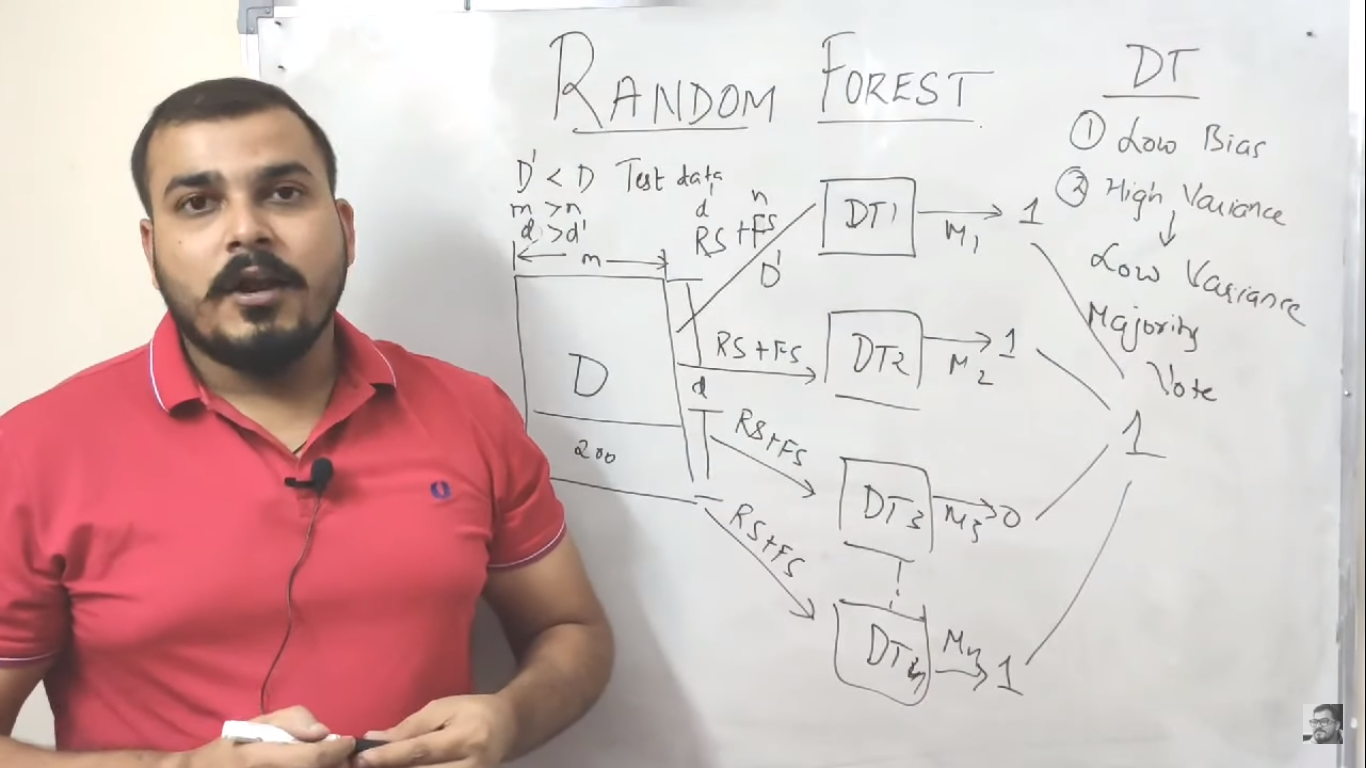

Classificier will give the majority votes while Regressor will give the mean or median of the every output of Decision tree regressor depending on data distribution.

Text(69,0.5,'Truth')

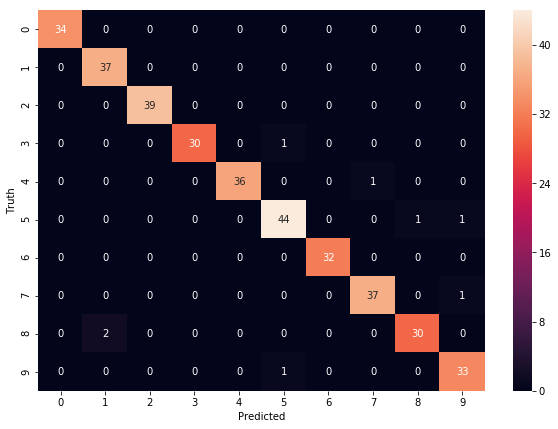

In [20]:
# One or more decision tree will be the random forest
#Ensemples Model is a technique that creates multiple machinelearning moddels and create final results. It useully produce correct 
#result than single model.It can avoid overfitting. 

#Identify the hand wrriten recognization

import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

for i in range(4):
    plt.matshow(digits.images[i])
    
#Make a dataframe

digits.data[:5]
df=pd.DataFrame(digits.data)
df.head()

df['target'] = digits.target # Create new column in dataframe
df.head()

# Machine Learning
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target, test_size=0.2)
len(x_train)

from sklearn.ensemble import RandomForestClassifier #When you are using multiple algorithms to predict the outcome then use ensemble
model=RandomForestClassifier(n_estimators=50) #n_estimator is number of trees.
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_predicted =model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [8]:
#Voting classifier - It is easy way to improvement of esemble method.

#Assuming you have two classes class-A and class-B

#Logistic Regression( has an inbuilt predict_proba() method) and SVC(set probability=True) both are able to estimate 
#class probabilities on their outputs i.e. they predict if input is class-A with probability a and class-B with probability b.
#If a>b then it outputs predicted class is A otherwise B .In a voting classifier setting the voting parameter to soft enables 
#them(SVM and LogiReg) to calculate their probability(also known as confidence score) individually and present it to the 
#voting classifier, then the voting classifier averages them and outputs the class with the highest probability.

Make sure that if you set voting=soft then the classifiers you provide can also calculate this confidence score.
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, naive_bayes, tree
clf1=LogisticRegression(random_state=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()

ensemble_model=VotingClassifier(estimator=[('lr',clf1),[('rf',clf2),('gnb',clf3), voting='hard']])

ensemble_model.fit(X_train,y_train)
ensemble_model.predict(X_test)

VotingClassifier(estimator=[('lr',clf1),('rf',clf2),('gnb',clf3)], voting='hard',weight=[2,1,1])

#the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more 
#false positives. You'll also add a Decision Tree with balanced weights to it

In [ ]:
############################### IRIS data set ##############################